# Pymaceuticals Inc.
---

## Analysis

### Data Cleaning
The data included one mouse with duplicate timepoints (ID=g989). This indicates the data was corrupted or entered incorrectly and cannot be considered reliable. Thus, all data for that mouse was dropped for this analysis.
  
### Description of Data
The bar charts below show the distribution of timepoints for each treatment, with the highest number of timepoints for the drug of interest, Capomulin, followed closely by Ramicane, each in excess of 200 total timepoints. The fewest timepoints observed, at around 150, were for Propriva.
  
The <i>Distribution of Female vs Male Mice</i> pie charts show 50.4% of the studied mice were male and 49.6% female.
  
For consideration of four particular treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin), a single potential outlier for Infubinol was discovered, with a tumor volume of 36.32 mm<sup>3</sup>, well below the value of the first quartile for that drug. No outliers were observed for Capomulin.
  
### Summary Statistics
The summary statistics show that Capomulin is nearly equivalent in efficacy to the drug Ramicane. Capomulin shows a mean tumor volume (MTV) of 40.67 mm<sup>3</sup> while Ramicane results in an MTV of 40.21 mm<sup>3</sup>. These are both superior to all other drugs, which have a minimum MTV of 52.32 mm<sup>3</sup> (Propriva). The standard deviation and standard error of Capomulin and Ramicane are also quite similar and notably smaller than the other drugs, indicating that these two top contenders also produce the most consistent results.
  
### Treatment of Mouse l509
The line chart <i>Capomulin Treatment of Mouse l509</i> indicates that, for this particular subject, Capomulin began reducing the tumor volume at 20 days of treatment. Tumor volume continued to shrink for most of the next 20 days, with a small temporary spike at 30 days, and a steady increase at around 34 days until the end of the study. This open-ended increase may be concerning if it indicates tumor resistance to Capomulin some time after 30 days. If the other mice show similar patterns, then a longer study may be necessary to assess Capomulin's long-term efficacy.
  
### Correlation of Weight and Tumor Volume
Finally, the scatter plot and line regression line show a strong positive correlation between mouse weight and tumor volume, with a correlation coeffient of 0.84. Therefore, we can expect on average that larger mice have larger tumors, regardless of treatment.



 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", sort=False)

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [60]:
# Checking the number of mice.
len(mouse_study_df['Mouse ID'].unique())

249

In [61]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
find_dupes_grp = mouse_study_df.groupby(["Mouse ID", "Timepoint"])
find_dupes_filter = (find_dupes_grp.size() > 1).reset_index().rename(columns={0: "Duplicate"})
find_dupes_df = pd.merge(mouse_study_df, find_dupes_filter, on=["Mouse ID", "Timepoint"])
find_dupes_df = find_dupes_df[find_dupes_df["Duplicate"]]
duplicate_mice = find_dupes_df["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [62]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_study_df[mouse_study_df["Mouse ID"] == duplicate_mice[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = mouse_study_df[mouse_study_df["Mouse ID"] != duplicate_mice[0]]
mouse_study_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [64]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_grp = mouse_study_clean_df.groupby("Drug Regimen")
tumor_volume_mean = drug_grp["Tumor Volume (mm3)"].mean().rename("Mean Tumor Volume")
tumor_volume_median = drug_grp["Tumor Volume (mm3)"].median().rename("Median Tumor Volume")
tumor_volume_variance = drug_grp["Tumor Volume (mm3)"].var().rename("Tumor Volume Variance")
tumor_volume_stddev = drug_grp["Tumor Volume (mm3)"].std().rename("Tumor Volume Std. Dev.")
tumor_volume_stderr = drug_grp["Tumor Volume (mm3)"].sem().rename("Tumor Volume Std. Err.")

tumor_statistics_df = pd.concat([tumor_volume_mean, tumor_volume_median, tumor_volume_variance, tumor_volume_stddev, tumor_volume_stderr], axis=1)
tumor_statistics_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_statistics_adv_df = drug_grp.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
tumor_statistics_adv_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

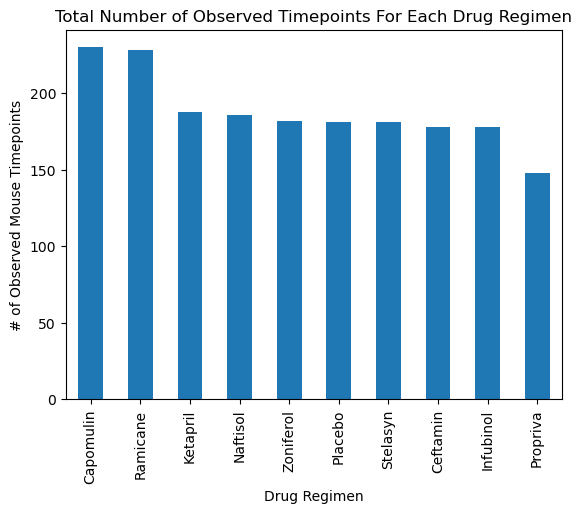

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_grp.size().sort_values(ascending=False).plot(kind='bar', ylabel="# of Observed Mouse Timepoints",
                                                  title="Total Number of Observed Timepoints For Each Drug Regimen");

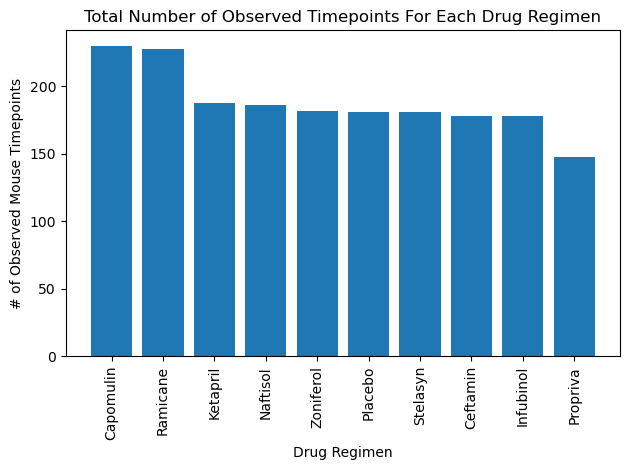

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count_srs = drug_grp.size().sort_values(ascending=False)
plt.bar(drug_count_srs.index, drug_count_srs)
plt.xticks(drug_count_srs.index, rotation=90)
plt.title("Total Number of Observed Timepoints For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()

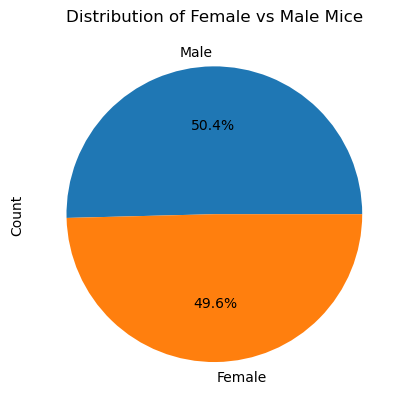

In [69]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_sex_grp = mouse_study_clean_df[['Mouse ID', 'Sex']].drop_duplicates('Mouse ID').groupby('Sex')
mouse_sex_srs = mouse_sex_grp.size().sort_index(ascending=False)

# Make the pie chart
mouse_sex_srs.plot(kind='pie', ylabel='Count', autopct='%1.1f%%', title="Distribution of Female vs Male Mice");

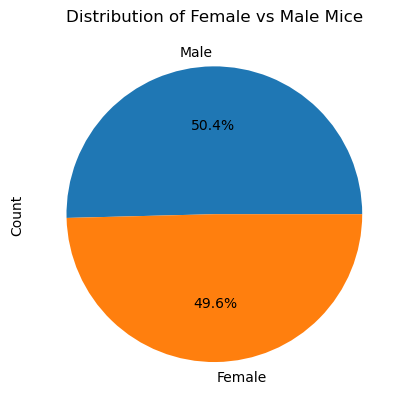

In [70]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_sex_grp = mouse_study_clean_df[['Mouse ID', 'Sex']].drop_duplicates('Mouse ID').groupby('Sex')
mouse_sex_srs = mouse_sex_grp.size().sort_index(ascending=False)

# Make the pie chart
plt.pie(mouse_sex_srs, autopct='%1.1f%%', labels=mouse_sex_srs.index)
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Count");

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = mouse_study_clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(mouse_study_clean_df, last_timepoint_df, on=['Mouse ID', 'Timepoint'], how='right')[['Mouse ID', 'Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a262,45,Placebo,70.717621
3,a275,45,Ceftamin,62.999356
4,a366,30,Stelasyn,63.440686
...,...,...,...,...
243,z435,10,Propriva,48.710661
244,z578,45,Ramicane,30.638696
245,z581,45,Infubinol,62.754451
246,z795,45,Naftisol,65.741070


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatment_tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_on_treatment_df = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == treatment] 
    treatment_quartiles = mice_on_treatment_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    treatment_iqr = treatment_quartiles[0.75] - treatment_quartiles[0.25]
    treatment_lower_bound = treatment_quartiles[0.25] - (1.5 * treatment_iqr)
    treatment_upper_bound = treatment_quartiles[0.75] + (1.5 * treatment_iqr)

    # add subset    
    treatment_tumor_volumes.append(mice_on_treatment_df["Tumor Volume (mm3)"])

    # Determine outliers using upper and lower bounds
    treatment_potential_outliers_df = mice_on_treatment_df[(mice_on_treatment_df["Tumor Volume (mm3)"] < treatment_lower_bound) |
                                                           (mice_on_treatment_df["Tumor Volume (mm3)"] > treatment_upper_bound)]
    print(f"{treatment}'s interquartile range (IQR): {treatment_iqr}")
    print(f"{treatment}'s potential outliers: {treatment_potential_outliers_df["Tumor Volume (mm3)"]}\n")


Capomulin's interquartile range (IQR): 7.781863460000004
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's interquartile range (IQR): 9.098536719999998
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's interquartile range (IQR): 11.477135160000003
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's interquartile range (IQR): 15.577752179999997
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



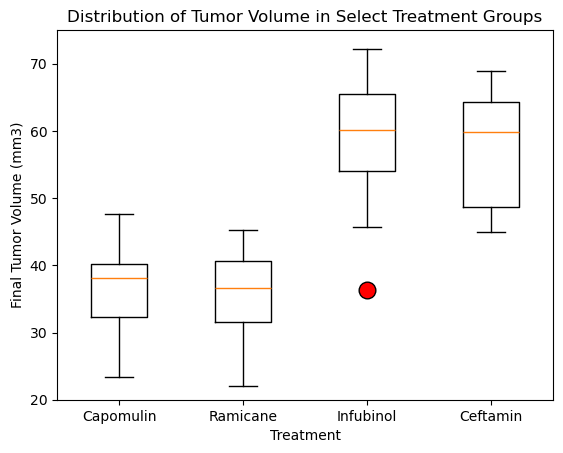

In [73]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
flierprops = {"marker": "o",
              "markerfacecolor": "red",
              "markeredgecolor": "black",
              "markersize": 12}
plt.boxplot(treatment_tumor_volumes, labels=treatments, flierprops=flierprops)
plt.ylim(20, 75)
plt.title("Distribution of Tumor Volume in Select Treatment Groups")
plt.xlabel("Treatment")
plt.ylabel("Final Tumor Volume (mm3)");

## Line and Scatter Plots

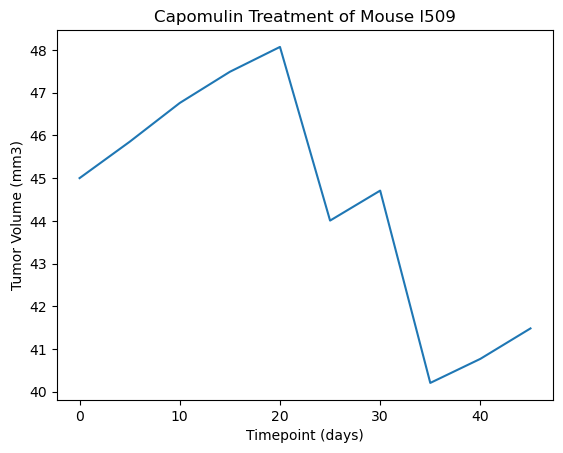

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id  ="l509"
drug_regimen = "Capomulin"

time_data_df = mouse_study_clean_df[(mouse_study_clean_df["Mouse ID"] == mouse_id) &
                                 (mouse_study_clean_df["Drug Regimen"] == drug_regimen)]
plt.plot(time_data_df["Timepoint"], time_data_df["Tumor Volume (mm3)"])
plt.title(f"{drug_regimen} Treatment of Mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)");

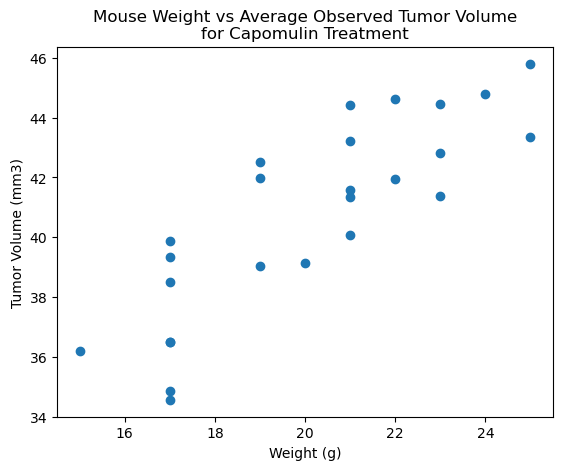

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug_regimen = "Capomulin"

drug_filter_df = mouse_study_clean_df[mouse_study_clean_df["Drug Regimen"] == drug_regimen]
weight_data_df = drug_filter_df.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()

weight_data = weight_data_df["Weight (g)"]
tumor_data = weight_data_df["Tumor Volume (mm3)"]

plt.scatter(weight_data, tumor_data)
plt.title("Mouse Weight vs Average Observed Tumor Volume\nfor Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)");

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


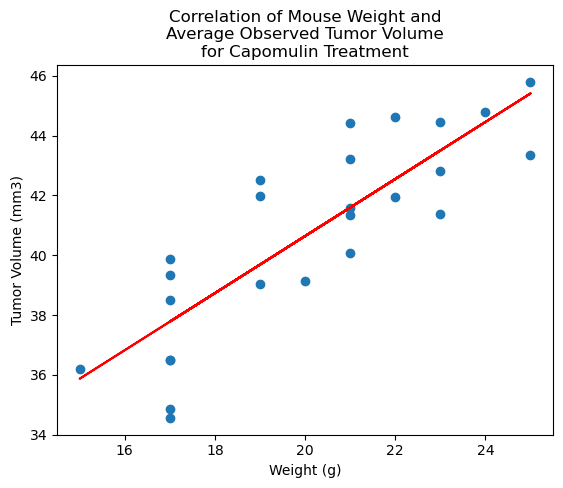

In [76]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight_data, tumor_data)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation.statistic, 2)}")

plt.scatter(weight_data, tumor_data)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_data, tumor_data)
regress_values = weight_data * slope + intercept
plt.plot(weight_data, regress_values, 'r-')

plt.title("Correlation of Mouse Weight and\nAverage Observed Tumor Volume\nfor Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)");